<a href="https://colab.research.google.com/github/karind7/Exploratory_Data_Analysis-vehicles_us/blob/main/Exploratory_Data_Analysis_vehicles_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: looking at the general information**

**The Dataset**

The data set we'll be using is a cars sale ads data set.
The data is straightforward. Each row represents a car sale ad. Each column contains car attributes such as price,	model year,	model	condition,	cylinders	fuel,	odometer,	transmission,	type, color, 4wd, date posted and days listed.


in this project we will research what affects the price of the car, and what cars are sold quickest.

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr

In [ ]:
try:
  data = pd.read_csv("/content/drive/MyDrive/data science/vehicles_us.csv")
except:
  data = pd.read_csv("/datasets/credit_scoring_eng.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


we can see alot of missing values in is_4wd, we will need to deal with it otheways that column is unusable of analysis

In [ ]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


we can see that is_4wd will is a binary data so the missing valuse are just equal to false, that is great

lowest priceis 1, it is weird and will be dealt with, probably some mistake. The max is also much higher than the 75% median so there are probably some outliers that scew thr data



In [ ]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


view of the table for better understanding of the data we are working with

**conclusion**:
1. fill null in 'is_4wd', 'cylinders', 'model_year', 'odometer' to zero and Convert the data to int
2. if the care is the same year and model than the number of cylinders is the same so fill where possible the value
3. turn time to the correct data type

# **Step 2: Data preprocessing**


In [ ]:
fillna_and_int = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for i in fillna_and_int:
  data[i] = data[i].fillna(0)
  data[i] = data[i].astype(int)
#created a list of all the columes that the missing values in them should be changed to zero and then cast to int

In [ ]:
def cylinder_check(row):
  if row["cylinders"] == 0:
    cylinder = data.loc[data["model"] == row["model"]].loc[data["model_year"] == row["model_year"]]["cylinders"].unique()
    for i in range(len(cylinder)):
      if cylinder[i] != 0:
        return cylinder[i]
  return row["cylinders"]

data["cylinders"] = data.apply(cylinder_check, axis=1)
# takes too long for my liking
#fill the cylinder by finding the same car model from the same year and taking information from there

In [ ]:
def odometer_check(row):
  if row["odometer"] == 0:
    odometer = data.loc[data["model"] == row["model"]].loc[data["model_year"] == row["model_year"]].loc[data["type"] == row["type"]]["odometer"].unique()
    for i in range(len(odometer)):
      if odometer[i] != 0:
        return odometer[i]
  return row["odometer"]

data["odometer"] = data.apply(odometer_check, axis=1)
#created a function that fills the odometer values that are equal to zero with the value of the odometer from a similar car

In [ ]:
def model_year_check(row):
  if row["model_year"] == 0:
    model_year = data.loc[data["model"] == row["model"]].loc[data["type"] == row["type"]]["model_year"].unique()
    for i in range(len(model_year)):
      if model_year[i] != 0:
        return model_year[i]
  return row["model_year"]

data["model_year"] = data.apply(model_year_check, axis=1)
#created a function that fills the model year values that are equal to zero with the value of the model year from a similar car

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   42258 non-null  object
 10  is_4wd        51525 non-null  int64 
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


now most of the missing values are in paint color

**conclusion**:
1. filled null in 'is_4wd' by other cars
2. 'cylinders', 'model_year', 'odometer' to zero as none of them can be naturally equal to zero and Convert the data type to int
3. the values equal to zero were changed to values from similar ads

# **Step 3: Calculating and adding to the table**

In [ ]:
#change the date posted values type to datatime 
data["date_posted"] = pd.to_datetime(data["date_posted"], format='%Y-%m-%d')

In [ ]:
data["vehicle_age"] = data["date_posted"].dt.year - data["model_year"]
data.loc[data["vehicle_age"] > 2000, "vehicle_age"] = -1

In [ ]:
data["average_mileage"] = data["odometer"] // data["vehicle_age"]
data.loc[data["average_mileage"] < 0, "average_mileage"] = 0
data.loc[data["vehicle_age"] == 0, "average_mileage"] = data['odometer']
data.loc[data["vehicle_age"] == -1, "vehicle_age"] = 0

In [ ]:
data["vehicle_age"] = data["vehicle_age"].astype(int)
data["average_mileage"] = data["average_mileage"].astype(int)

In [ ]:
def condition_numarical(row):
    condition =  row["condition"]
    if condition == "new":
        return 5
    elif condition == "like new":
      return 4
    elif condition == "excellent":
      return 3
    elif condition == "good":
      return 2
    elif condition == "fair":
      return 1
    return 0
data["condition"] = data.apply(condition_numarical, axis=1)

**conclusion**:
1. turn time to the correct data type
2. added vehicle_age and average_mileage column, played with -1 and 0 inorder to handle the divishen
3. added condition column

# **Step 4: Carry out exploratory data analysis**

In [ ]:
data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,vehicle_age,average_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000
mean,12132.464920,2009.338030,2.637535,6.119049,114934.272994,0.496303,39.55476,8.577739,18227.707113
std,10040.803015,28.681974,0.712447,1.662046,64619.282276,0.499991,28.20427,6.251909,14956.212060
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,69683.000000,0.000000,19.00000,4.000000,10421.000000
50%,9000.000000,2011.000000,3.000000,6.000000,112548.000000,0.000000,33.00000,7.000000,14997.000000
75%,16839.000000,2014.000000,3.000000,8.000000,154740.000000,1.000000,53.00000,12.000000,21644.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,110.000000,373200.000000


In [ ]:
cheack_data=["price", "vehicle_age", "average_mileage", "cylinders", "condition"]

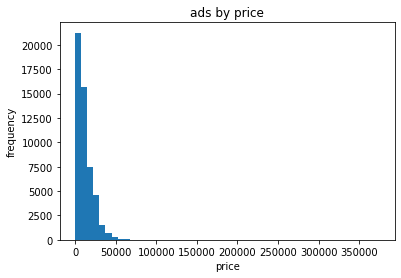

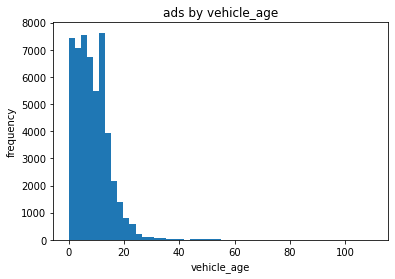

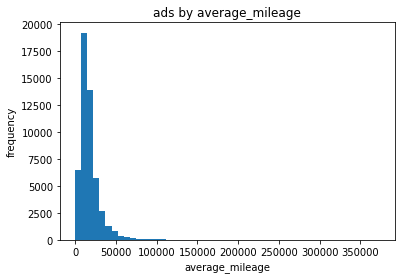

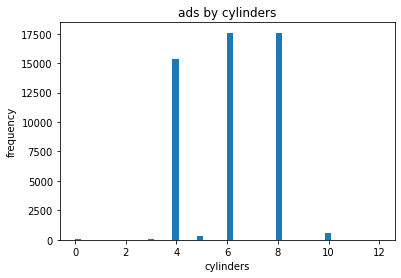

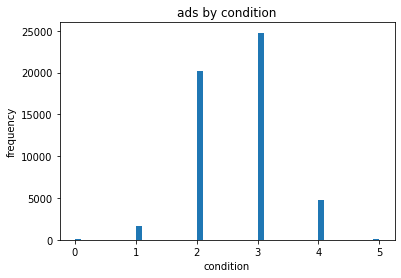

In [ ]:
for i in cheack_data:
  plt.hist(data[i], bins = 50)
  plt.title("ads by {}".format(i))
  plt.xlabel(i)
  plt.ylabel('frequency')
  plt.show()

ploted histograms for"price", "vehicle_age", "average_mileage", "cylinders", "condition" and looked how outliers affect the form and readability of the histograms.  "cylinders" and "condition" are catgorical and so are looking good un like the oteres. we will plot the data again with the appropriate range and examine the data after that

In [ ]:
# find the Interquartile range for prices of the cars in order to find the wanted the range of the price without the outliers
Q1 = data.query('price > 0')["price"].quantile(0.25)
Q3 = data.query('price > 0')['price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# insulating the relevant price data
relevent_data = data.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
relevent_data.describe()["price"]

count    49879.000000
mean     11095.558472
std       7806.520888
min          1.000000
25%       4995.000000
50%       8990.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64

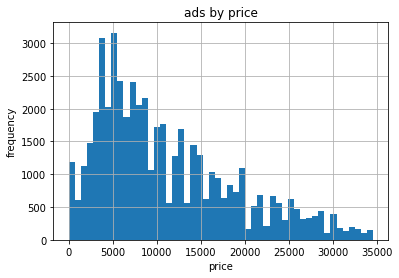

In [ ]:
# create a histogram of the relevant price data
relevent_data.hist("price",  bins=50, range=(1,34595))
plt.title("ads by price")
plt.xlabel("price")
plt.ylabel('frequency')
plt.show()

looking at the price of the cars without outliers we can see a peek at about the price of 5,000 for a car and decline from there

In [ ]:
# find the Interquartile range for vehicle age of the cars in order to find the wanted the range of the price without the outliers
Q1 = data.query('model_year > 0')["vehicle_age"].quantile(0.25)
Q3 = data.query('model_year > 0')['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# insulating the relevant vehicle age data
relevent_data = relevent_data.query('(@Q1 - 1.5 * @IQR) <= vehicle_age <= (@Q3 + 1.5 * @IQR)')
relevent_data.describe()["vehicle_age"]

count    49146.000000
mean         8.385138
std          5.232921
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         24.000000
Name: vehicle_age, dtype: float64

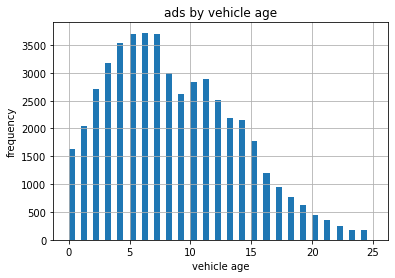

In [ ]:
# create a histogram of the relevant vehicle age data
relevent_data.hist("vehicle_age",  bins=50, range=(0,25))
plt.title("ads by vehicle age")
plt.xlabel("vehicle age")
plt.ylabel('frequency')
plt.show()

looking at the vehicle age without outliers we can see a peek at about the age of arount 5 for a car and decline from there so most cares are posted at that age

In [ ]:
# find the Interquartile range for average mileage of the cars in order to find the wanted the range of the price without the outliers
Q1 = data.query('odometer > 0')["average_mileage"].quantile(0.25)
Q3 = data.query('odometer > 0')['average_mileage'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# insulating the relevant average mileage data
relevent_data = relevent_data.query('0 < average_mileage <= (@Q3 + 1.5 * @IQR)')
relevent_data.describe()["average_mileage"]

count    45930.000000
mean     15670.753386
std       7635.744089
min          1.000000
25%      10425.000000
50%      14529.000000
75%      20000.000000
max      38419.000000
Name: average_mileage, dtype: float64

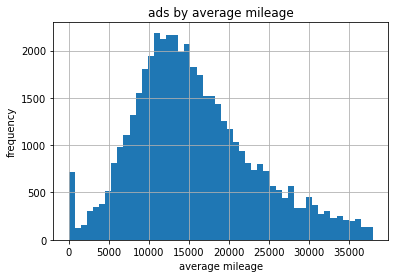

In [ ]:
# create a histogram of the relevant average mileage data
relevent_data.hist("average_mileage",  bins=50, range=(1,37988))
plt.title("ads by average mileage")
plt.xlabel("average mileage")
plt.ylabel('frequency')
plt.show()

looking at the average mileage of the cars without outliers we can see a peek at about the mileage 12000 for a car and decline from there so most cares are posted with that mileage so probble thats the average mileage for a 5 yers old car

In [ ]:
relevent_data.describe()["cylinders"]

count    45930.000000
mean         6.078119
std          1.646380
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

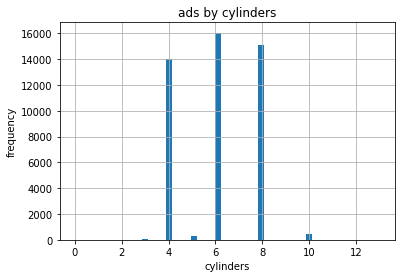

In [ ]:
relevent_data.hist("cylinders",  bins=50, range=(0,13))
plt.title("ads by cylinders")
plt.xlabel("cylinders")
plt.ylabel('frequency')
plt.show()

most cars have 4,6 or 8 cylinders

In [ ]:
relevent_data.describe()["condition"]

count    45930.000000
mean         2.617135
std          0.703028
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

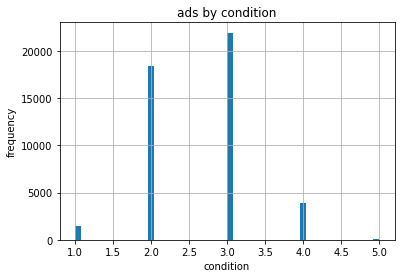

In [ ]:
relevent_data.hist("condition",  bins=50, range=(1,5))
plt.title("ads by condition")
plt.xlabel("condition")
plt.ylabel('frequency')
plt.show()

most cars are in good or excellent condition

In [ ]:
relevent_data.describe()["days_listed"]

count    45930.000000
mean        39.548182
std         28.249419
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [ ]:
# find the Interquartile range for days listed of the cars in order to find the wanted the range of the price without the outliers
Q1 = data["days_listed"].quantile(0.25)
Q3 = data['days_listed'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# insulating the relevant days listed data
relevent_data = relevent_data.query('0 < days_listed <= (@Q3 + 1.5 * @IQR)')
relevent_data.describe()["days_listed"]

count    44433.000000
mean        36.673553
std         23.130910
min          1.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64

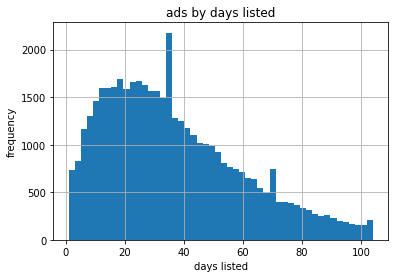

In [ ]:
# create a histogram of the relevant days listed data
relevent_data.hist("days_listed", bins=50, range=(1,104))
plt.title("ads by days listed")
plt.xlabel("days listed")
plt.ylabel('frequency')
plt.show()

most cars are listed about 20 days before they are bought

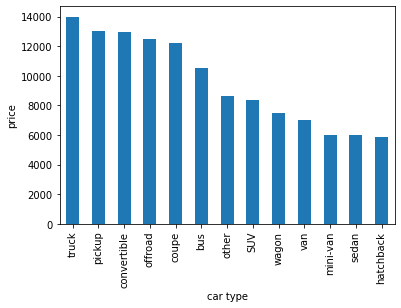

In [ ]:
price_by_type = relevent_data.groupby("type")["price"].median().sort_values(ascending=False)
price_by_type.plot(x = "type", y = "price", kind = "bar")
plt.ylabel('price')
plt.xlabel('car type')
plt.show()

The most expensive cars are buses, trucks and pickups and it make sense they are the largest

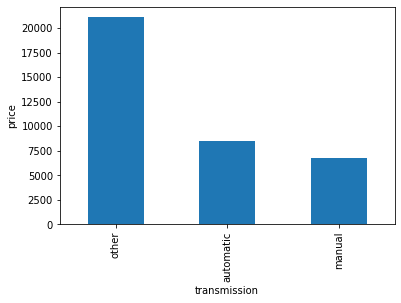

In [ ]:
price_by_transmission	= relevent_data.groupby("transmission")["price"].median().sort_values(ascending=False)
price_by_transmission	.plot(x = "transmission", y = "price", kind = "bar")
plt.ylabel('price')
plt.xlabel('transmission')
plt.show()

sadly here we dont get inaf information become the most expensive catagori is other and it dosent dive us a lot of information, we can see that automatic cars are slightly more expensive

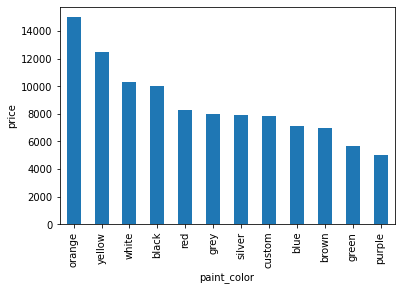

In [ ]:
price_by_paint_color = relevent_data.groupby("paint_color")["price"].median().sort_values(ascending=False)
price_by_paint_color.plot(x = "paint_color", y = "price", kind = "bar")
plt.ylabel('price')
plt.xlabel('paint_color')
plt.show()

The most expensive cars are orange and yellow 

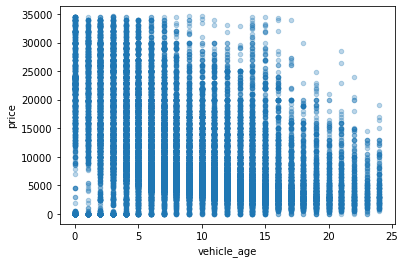

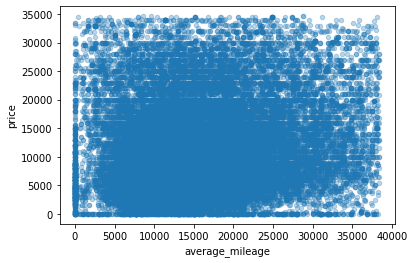

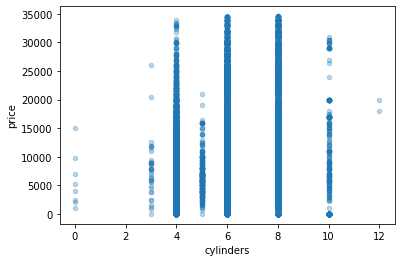

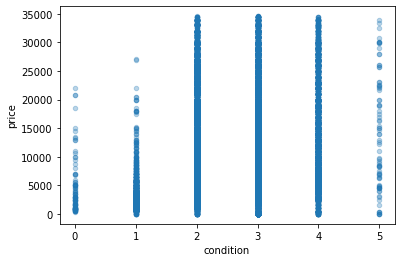

In [ ]:
cheack_data=[ "vehicle_age", "average_mileage", "cylinders", "condition"]
for i in range(len(cheack_data)):
 relevent_data.plot(x=cheack_data[i], y="price", kind='scatter', alpha=0.3) 

In [ ]:
for i in cheack_data:
  corrl = data["price"].corr(data[i])
  if abs(corrl) > 0.5:
    ans = " strong correlation"  
  elif abs(corrl) > 0.3:
    ans = "no strong correlation"
  else:
    ans = "no correlation"                         
  print("the corlashen between price and {} is {:.2} so there is {}".format(i,corrl,ans))

the corlashen between price and vehicle_age is -0.4 so there is no strong correlation
the corlashen between price and average_mileage is 0.16 so there is no correlation
the corlashen between price and cylinders is 0.29 so there is no correlation
the corlashen between price and condition is 0.22 so there is no correlation


the strongest correlation is between the vehicle age and the price the younger the vehicle the more expensive it the and also there is some correlation price and for the type of care and color so a yellow truck should be quite expensive

# **Step 5: overall conclusion**

in summary:
learning from the data the avrege car that people try to sell is 5 years old, at a mileage of 12000 a year, costs of 5,000, has 4, 6 or 8 cylinders and will probably  be sold within 20 days

in checking for corolashen we found that what most impackted the car prive is age, the older the car the cheaper it is

the kind of car and color also affect the price, the bigger the car the more expensive it and unique colors are also more expensive